In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<AxesSubplot:>

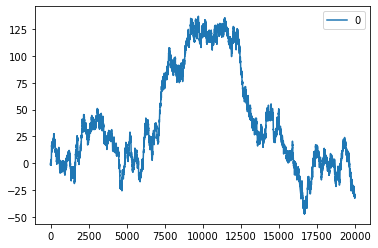

In [133]:
X = pd.DataFrame(np.random.randn(20000)).cumsum()
X.plot()

In [134]:
hurst_exponent(X[0])

0.4902133115830918

In [139]:
nolds.corr_dim(X[0],)

TypeError: corr_dim() missing 1 required positional argument: 'emb_dim'

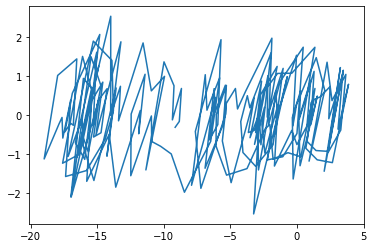

In [110]:
plt.plot(X[0],X[0].diff())

In [121]:
def hurst_exponent(X: pd.Series) -> float:
    """
    Calculates the Hurst Exponent from a time series.
    """
    delta_B = []
    time_windows = list(range(1,int(np.sqrt(X.shape[0])),1))
    for time_window in time_windows:
            delta_B.append((X - X.shift(time_window)).abs().mean())
    hurst_exponent_hat = np.polyfit(x=np.log(time_windows), y=np.log(delta_B), deg=1)[0]
    return hurst_exponent_hat

In [95]:
ts = pd.read_csv('./jpx/train_files/stock_prices.csv')
test = ts.query('SecuritiesCode==4169')

In [7]:
(test.Close - test.Close.shift(10)).abs().mean()

604.4977375565611

In [8]:
stock_hurst_exponents = []
for sec_code in ts.SecuritiesCode.value_counts().index:
    test = ts.query('SecuritiesCode==@sec_code')
    he = hurst_exponent(test.Close)
    #print(f"Hurst exponent of security {sec_code} is {he:.2f}")
    stock_hurst_exponents.append(he)

In [12]:
stock_hurst_exponent_df = pd.DataFrame(np.array([ts.SecuritiesCode.value_counts().astype(int).index.tolist(), stock_hurst_exponents]).T, columns=['SercuritiesCode', 'hurst_exponent'])


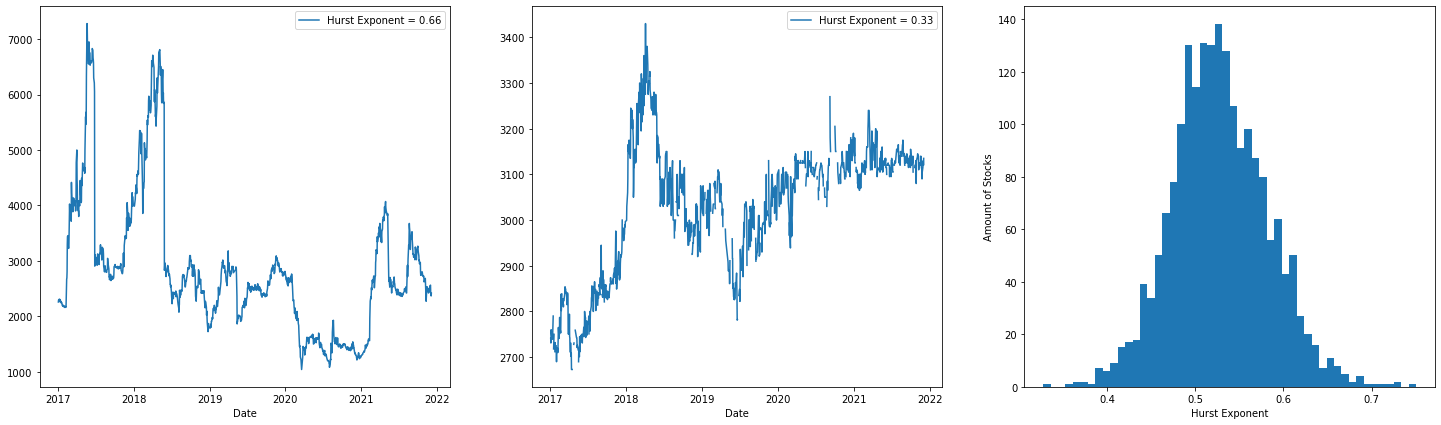

In [13]:
anti_persistent_stock = 9537
persistent_stock = 4595

fig, axs = plt.subplots(1,3)
_ = axs[0].plot(pd.to_datetime(ts.query(f'SecuritiesCode=={persistent_stock}').Date), ts.query(f'SecuritiesCode=={persistent_stock}').Close)
hurst_persistent = stock_hurst_exponent_df.query(f"SercuritiesCode=={persistent_stock}").hurst_exponent.iloc[0]
axs[0].legend([f'Hurst Exponent = {hurst_persistent:.2f}'])
_ = axs[1].plot(pd.to_datetime(ts.query(f'SecuritiesCode=={anti_persistent_stock}').Date), ts.query(f'SecuritiesCode=={anti_persistent_stock}').Close)
hurst_anti = stock_hurst_exponent_df.query(f"SercuritiesCode=={anti_persistent_stock}").hurst_exponent.iloc[0]
axs[1].legend([f'Hurst Exponent = {hurst_anti:.2f}'])
axs[0].set_xlabel('Date')
axs[1].set_xlabel('Date')
axs[2].set_xlabel('Hurst Exponent')
axs[2].set_ylabel('Amount of Stocks')

axs[2] = plt.hist(stock_hurst_exponent_df.hurst_exponent, bins=50)
fig.set_size_inches(25,7)


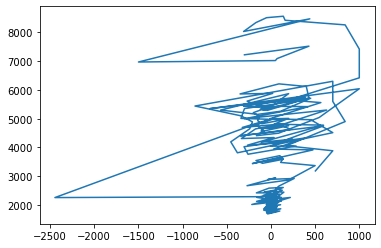

In [101]:
plt.plot(test.Close.diff(),test.Close)

# Mandelbrot set


Let's start by recalling the complex map:
$$z_{n+1} = z_{n}^2 + c$$
This will map will be critical in order to construct the Mandelbrot set as we will see.

In [22]:
#control parameter
c = 0.3j + 0.3

#initial conditions
z_0 = 1j + 1

In [24]:
def complex_map_iteration(z_n: complex, c: complex) -> complex:
    return z_n**2 + c

In [42]:
z_n = z_0
for i in range(1000):
    z_n = complex_map_iteration(z_n=z_n, c=c)
    if np.isnan(z_n*np.conjugate(z_n)):
        break

C:\Users\darth\Anaconda3\envs\stocks\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in cdouble_scalars
  after removing the cwd from sys.path.
C:\Users\darth\Anaconda3\envs\stocks\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in cdouble_scalars
  after removing the cwd from sys.path.


In [68]:
c = -2 - 2.j

c*np.conjugate(c)

(8+0j)

In [64]:
real_grid, image_grid = np.meshgrid(real, imag)

In [94]:
z_0 = real_grid + image_grid * 1.j
c = real_grid + image_grid * 1.j

In [192]:
def complex_map_iteration(z_n: complex, c: complex) -> complex:
    return z_n ** 2 + c

In [196]:
grid_size = 10000
real = np.linspace(-2, 0.5, grid_size)
imag = np.linspace(-2, 2, grid_size)
real_grid, image_grid = np.meshgrid(real, real, sparse=True)
c = real[np.newaxis,:] + imag[:,np.newaxis] * 1.j

z_n = 0+ 0.j

for i in range(20):
    z_n = complex_map_iteration(z_n=z_n, c=c)

C:\Users\darth\Anaconda3\envs\stocks\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  
C:\Users\darth\Anaconda3\envs\stocks\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in square
  


# Duffing Oscillator 

Instead of using Hooke's law, that grows linearly with displacement, to write down the equation of motion of a mass attached to a spring, we have a spring that is modelled using the cube of displacement. Note that there is a dissipative force and also an external force being applied to the mass. We will observe that the motion of the mass is characterized by two different phases: a transient and a post-transient motion. The system is always attracted to this post-transient motion. In other words, when the dynamical system is dissipative there will be an attractor that pushes the system towards the post-transient solution. Finally, the equation bellow is the Duffing oscillator follows down below:
$$ m\frac{d^{2}x}{dt^{2}} + r\frac{dx}{dt} + sx^{3} = A_{f}\cos{\omega t}$$

In order to solve this equation of motion we will use the simple Euler method

First off, let's review what the Euler method actually looks like for a simples equation of motion, for which we can compute the actual analytical solution very easily:
$$ \dot{y(t)} = y $$
Given the following initial condition $y(0) = 1$, we know the analytical solution to be $y(t)=e^{t}$. In order to generate a numerical solution we want to find an iterative map to equation of motion above using the Euler method. In order to do this, we simply resort to the derivative definition - without actually taking the limit:
$$\frac{d y}{dt}=\lim_{\Delta t \to 0} \frac{y_{t+\Delta t} - y_{t}}{\Delta t} \rightarrow \frac{y_{t+\Delta t} - y_{t}}{\Delta t} $$
Replacing the above expression for the time derivative of $y$ in the equation of motion we have:
$$\frac{y_{t+\Delta t} - y_{t}}{\Delta t} = y_{t} \rightarrow y_{t+\Delta t}=y_{t}(\Delta t + 1)$$
Hence bellow we define the iteration function with this exact expression:

In [22]:
def iteration(y_t, delta_t):
    return y_t*(delta_t + 1)

delta_t = 0.01
y_0 = 1
step_amount = 100

trajectory = []
y_t = y_0
trajectory.append(y_t)
for i in range(step_amount - 1):
    y_t = iteration(y_t, delta_t)
    trajectory.append(y_t)

For the initial condition and the given number of steps we have the following comparison:

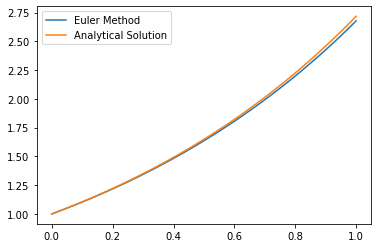

In [25]:
t = np.linspace(0, delta_t * step_amount, step_amount)
plt.plot(t, trajectory)
plt.plot(t, np.exp(t))
_ =plt.legend(['Euler Method', 'Analytical Solution'])

We can see the numerical solution and the analytical solution start to diverge after 100 timesteps.

For a simple version of the Duffing Oscillator equation of motion, with only two control parameters, we have the following:
$$ \ddot{x} + r\dot{x} + x^{3} = A_{f}\cos{t}$$

After some work with the equations we derive the following expression:
$$x_{t+2\Delta t} = \Delta t^{2}(A_{f} \cos{t} - x_{t}^{3}) + r\Delta t (x_{t + \Delta t} - x_{t})  + 2x_{t+\Delta t} - x_{t} $$

We also have the following initial conditions:
$$\dot{x_{0}} = 3$$
$$ x_{0} = 3$$
That can be translated into:
$$x_{0} = 3$$
$$x_{\Delta t} = 3(\Delta t + 1)$$


In [92]:
def duffing_iteration(x_tdeltat, x_t, delta_t, r, A, step):
    return delta_t**2*(A*np.cos(delta_t*step) - x_t**3) + r*delta_t*(x_tdeltat-x_t) + 2*x_tdeltat - x_t

delta_t = 0.000001
x_0 = 3
r = 0.05
A = 7.5
x_deltat = 3
step_amount = 30000000

trajectory = []
velocity = []
trajectory.append(x_0)
trajectory.append(x_deltat)
x_tdeltat = x_deltat 
x_t2deltat = delta_t**2*(A - x_0**3) + r*delta_t*(x_deltat-x_0) + 2*x_deltat - x_0
instant_velocity = (x_t2deltat - x_tdeltat)/delta_t
for i in range(step_amount - 2):
    x_t2deltat, x_tdeltat = duffing_iteration(x_t2deltat, x_tdeltat, delta_t, r, A, i), x_t2deltat
    trajectory.append(x_t2deltat)
    velocity.append((x_t2deltat - x_tdeltat)/delta_t)

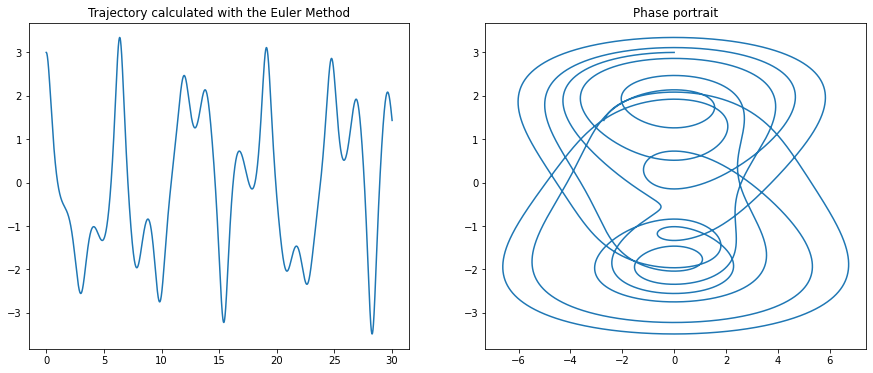

In [93]:
t = np.linspace(0, delta_t * step_amount, step_amount)
fig, axs = plt.subplots(1,2)
axs[0].plot(t, trajectory)
axs[0].set_title('Trajectory calculated with the Euler Method')
axs[1].plot(velocity, trajectory[:-2])
axs[1].set_title('Phase portrait')
fig.set_size_inches(15,6)
plt.show()

In [118]:
import nolds

In [119]:
nolds.hurst_rs(X[0])

0.8848070583637029

C:\Users\darth\Anaconda3\envs\stocks\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in absolute
  This is separate from the ipykernel package so we can avoid doing imports until


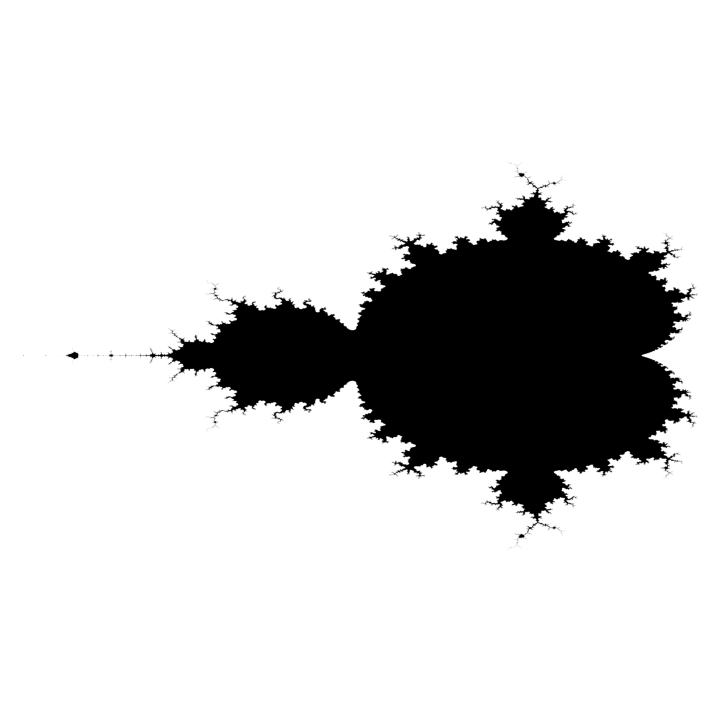

In [199]:
fig = plt.figure(figsize=(10,10))

plt.imshow(abs(z_n) <= 2, cmap="binary")
plt.axis("off")
plt.gca().set_aspect("equal")
plt.tight_layout()



In [146]:
x = np.real(c[np.where(~np.isnan(z_n))])
y = np.imag(c[np.where(~np.isnan(z_n))])

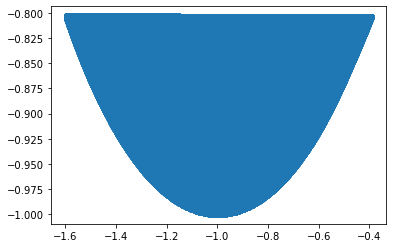

In [150]:
plt.scatter(x[:1000000], y[:1000000])


In [151]:
def complex_matrix(xmin, xmax, ymin, ymax, pixel_density):
    re = np.linspace(xmin, xmax, int((xmax - xmin) * pixel_density))
    im = np.linspace(ymin, ymax, int((ymax - ymin) * pixel_density))
    return re[np.newaxis, :] + im[:, np.newaxis] * 1j

In [152]:
def is_stable(c, num_iterations):
    z = 0
    for _ in range(num_iterations):
        z = z ** 2 + c
    return abs(z) <= 2

In [154]:
def get_members(c, num_iterations):
    mask = is_stable(c, num_iterations)
    return c[mask]

In [165]:
np.newaxis

C:\Users\darth\Anaconda3\envs\stocks\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.
C:\Users\darth\Anaconda3\envs\stocks\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in square
  after removing the cwd from sys.path.


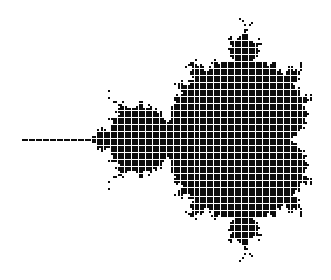

In [156]:
c = complex_matrix(-2, 0.5, -1.5, 1.5, pixel_density=51)
members = get_members(c, num_iterations=20)

plt.scatter(members.real, members.imag, color="black", marker=",", s=1)
plt.gca().set_aspect("equal")
plt.axis("off")
plt.tight_layout()
plt.show()

C:\Users\darth\Anaconda3\envs\stocks\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.
C:\Users\darth\Anaconda3\envs\stocks\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in square
  after removing the cwd from sys.path.
C:\Users\darth\Anaconda3\envs\stocks\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in absolute
  """


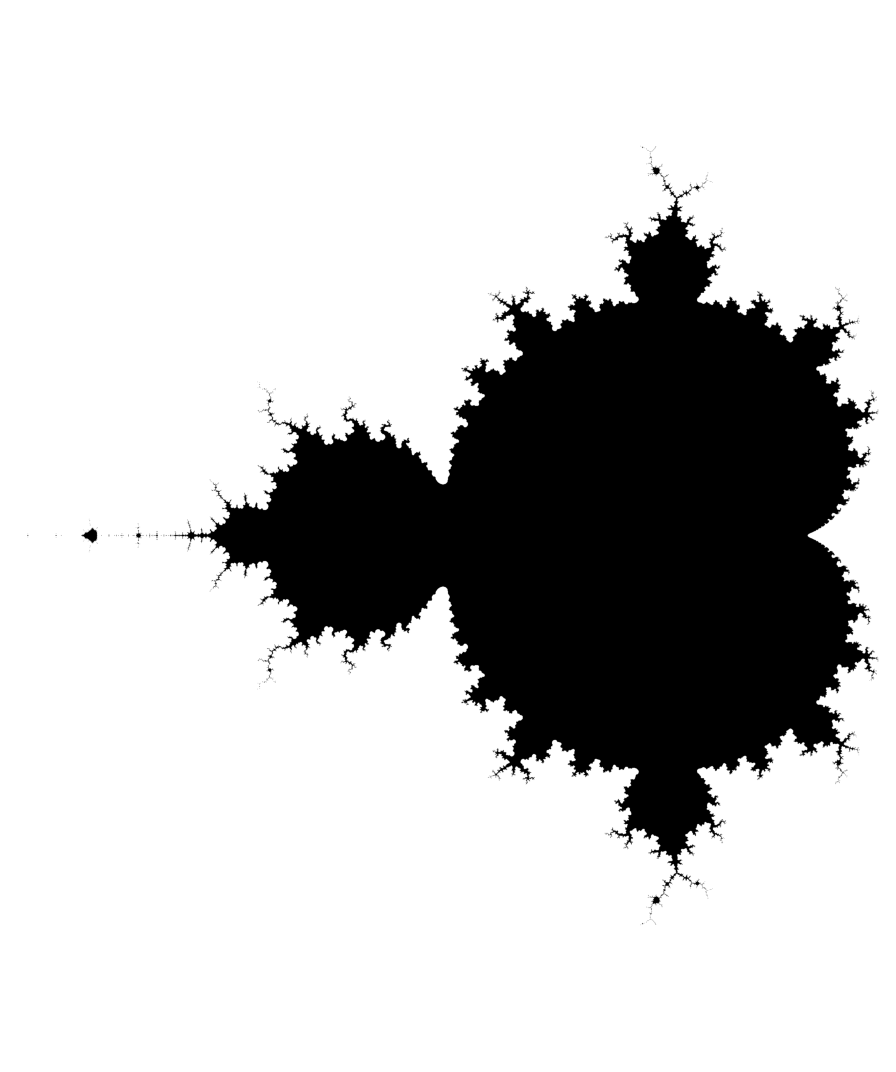

In [160]:
c = complex_matrix(-2, 0.5, -1.5, 1.5, pixel_density=1024)
fig = plt.figure(figsize=(15,15))
plt.imshow(is_stable(c, num_iterations=20), cmap="binary")
plt.gca().set_aspect("equal")
plt.axis("off")
plt.tight_layout()
plt.show()

In [248]:
stock_hurst_exponent_df.sort_values(by='hurst_exponent')

,SercuritiesCode,hurst_exponent
669,9537.0,0.327646
583,9535.0,0.355354
118,7840.0,0.363665
913,8530.0,0.369100
1501,4994.0,0.370233
...,...,...
1000,2768.0,0.708951
1336,2573.0,0.720770
935,3075.0,0.726246
651,9631.0,0.727413


Estimated Hurst exponent is 0.50


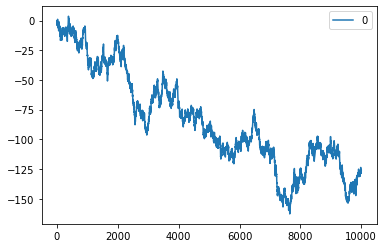

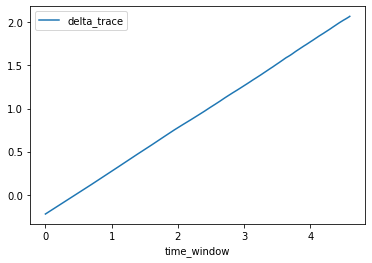

In [171]:
X = pd.DataFrame(np.random.randn(10000)).cumsum()
X.plot()
delta_B = []
time_windows = list(range(1,int(np.sqrt(X.shape[0])),1))
for time_window in time_windows:
        delta_B.append((X - X.shift(time_window)).abs().mean().iloc[0])
hurst_exponent_hat = np.polyfit(x=np.log(time_windows), y=np.log(delta_B), deg=1)[0]
pd.DataFrame(np.dstack([np.log(time_windows), np.log(delta_B)]).reshape(-1,2), columns=['time_window', 'delta_trace']).set_index('time_window').plot()
print(f"Estimated Hurst exponent is {hurst_exponent_hat:.2f}")

<AxesSubplot:xlabel='time_window'>

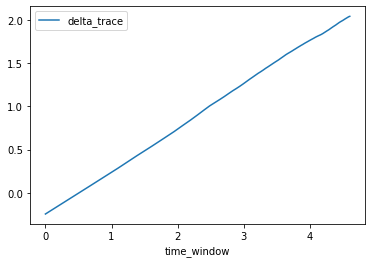

array([ 0.51151933, -4.01562012])

In [30]:
delta_B

[0    0.005752
 dtype: float64,
 0    0.005009
 dtype: float64,
 0    0.006369
 dtype: float64,
 0   -0.000264
 dtype: float64,
 0    0.000108
 dtype: float64,
 0    0.004915
 dtype: float64,
 0    0.005233
 dtype: float64,
 0   -0.000186
 dtype: float64,
 0    0.00264
 dtype: float64,
 0    0.000685
 dtype: float64,
 0    0.000747
 dtype: float64,
 0   -0.000266
 dtype: float64,
 0   -0.003445
 dtype: float64,
 0   -0.005723
 dtype: float64,
 0   -0.005294
 dtype: float64,
 0   -0.003098
 dtype: float64,
 0   -0.006769
 dtype: float64,
 0   -0.003418
 dtype: float64,
 0    0.000837
 dtype: float64]